In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#imports for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

#https://keras.io/api/optimizers/ Different optimisers here. Can use different ones for report. Look into Adam parameters.

In [2]:
dataset = pd.read_csv("breast_cancer.csv")
dataset.head(10)

,id,diagnosis,diagnosis_Num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
X = dataset.iloc[ : ,3: ]
Y = dataset.iloc[ : ,2]
Y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_Num, Length: 569, dtype: int64

In [4]:
X.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
null_values = dataset.isnull().sum()

print("Null values in the DataFrame:")
print(null_values)

Null values in the DataFrame:
id                         0
diagnosis                  0
diagnosis_Num              0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
#Some of the values may look between 0 and 1. We want to remove that numerical significance across the columns. 
#Remember a neuron fires between 0 and 1 so we need to squash all the valuues using min max formula.
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()
#astype async type
X = mmScaler.fit_transform(X.astype(float))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
#building the network
model = Sequential()
model.add(Dense(30, activation="relu")) #(20, activation="relu")) - baseline
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(2, activation=tf.nn.softmax)) 
#Need two values for classification. Look into softmax.
# The end layer neurons should always equal the amount of hidden layers.

In [9]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy') #Adam optimizer - baseline

In [10]:
model.fit(x=X_train, y=y_train.values, epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 1ms/step - loss: 0.6775
Epoch 2/300
16/16 [==============================] - 0s 988us/step - loss: 0.6427
Epoch 3/300
16/16 [==============================] - 0s 1ms/step - loss: 0.5829
Epoch 4/300
16/16 [==============================] - 0s 933us/step - loss: 0.4871
Epoch 5/300
16/16 [==============================] - 0s 925us/step - loss: 0.3657
Epoch 6/300
16/16 [==============================] - 0s 936us/step - loss: 0.2573
Epoch 7/300
16/16 [==============================] - 0s 891us/step - loss: 0.1967
Epoch 8/300
16/16 [==============================] - 0s 905us/step - loss: 0.1673
Epoch 9/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1473
Epoch 10/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 11/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1126
Epoch 12/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1013
Epoch 13/300
16/16 [=====

16/16 [==============================] - 0s 978us/step - loss: 0.0037
Epoch 199/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 200/300
16/16 [==============================] - 0s 948us/step - loss: 0.0035
Epoch 201/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 202/300
16/16 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 203/300
16/16 [==============================] - 0s 941us/step - loss: 0.0074
Epoch 204/300
16/16 [==============================] - 0s 950us/step - loss: 0.0118
Epoch 205/300
16/16 [==============================] - 0s 871us/step - loss: 0.0068
Epoch 206/300
16/16 [==============================] - 0s 906us/step - loss: 0.0036
Epoch 207/300
16/16 [==============================] - 0s 873us/step - loss: 0.0035
Epoch 208/300
16/16 [==============================] - 0s 960us/step - loss: 0.0039
Epoch 209/300
16/16 [==============================] - 0s 908us/step - loss: 0.0041
Epoch 210/30

16/16 [==============================] - 0s 870us/step - loss: 5.7850e-04
Epoch 296/300
16/16 [==============================] - 0s 864us/step - loss: 5.4787e-04
Epoch 297/300
16/16 [==============================] - 0s 1ms/step - loss: 5.4910e-04
Epoch 298/300
16/16 [==============================] - 0s 1ms/step - loss: 5.7377e-04
Epoch 299/300
16/16 [==============================] - 0s 1ms/step - loss: 5.2505e-04
Epoch 300/300
16/16 [==============================] - 0s 990us/step - loss: 5.1939e-04


In [11]:
predictions = model.predict(X_test)
#predictions

2/2 [==============================] - 0s 3ms/step


In [12]:
#for i in range(0, len(X_test)):
    #print("Predicted = ", np.argmax(predictions[i]))

In [13]:
#y_test

In [14]:
#Pre Processing so we can compare the predicted results:
predictionList = []

for i in range(0, len(X_test)):
    predictionList.append(np.argmax(predictions[i]))

In [15]:
from pandas import DataFrame
predictionsFrame = DataFrame(predictionList)

In [16]:
print("Classification Report: ")
print(classification_report(y_test, predictionsFrame))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictionsFrame))


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57

Confusion Matrix: 
[[34  1]
 [ 0 22]]


In [17]:
#At predicting 0 it got 35 correct and 0 wrong.
#At predicting 1 it got 21 correct and 1 wrong.

# CHANGE TEST_SIZE AND RANDOM_STATE for report.
# Also settings with adam optimizer. 

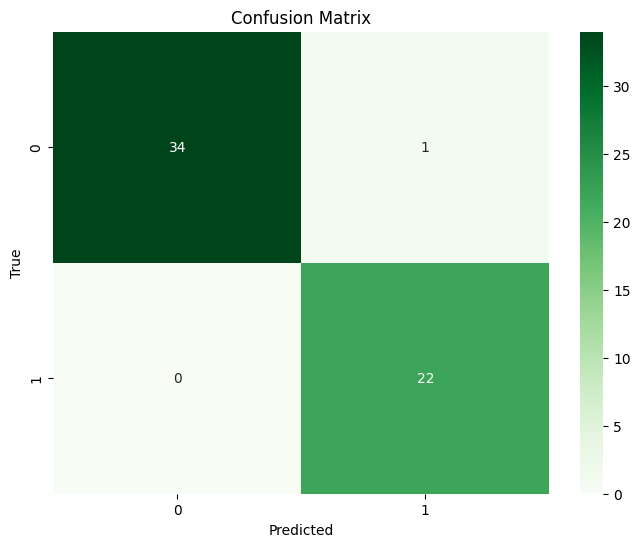

In [18]:
# Building confusion matrix plot

cm = confusion_matrix(y_test, predictionsFrame)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", 
            xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()